In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, randint, zscore
import pickle

%matplotlib inline
pd.set_option('display.max_columns', None)

• DOMAIN: Telecom

• CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all
relevant customer data and develop focused customer retention programs.

• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents

##Part - A

In [ ]:
churn1 = pd.read_csv('/content/TelcomCustomer-Churn_1.csv')
churn2 = pd.read_csv('/content/TelcomCustomer-Churn_2.csv')

In [ ]:
churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [ ]:
churn2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn = pd.merge(churn1,churn2,how = 'outer',on = 'customerID')
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
churn.to_csv('churn_merged.csv',index = False)

In [ ]:
original_churn = set(churn1.columns) | set(churn2.columns)
merged_churn = set(churn.columns)
if original_churn == merged_churn:
  print('All the columns are incorporated in the merged DataFrame')
else:
  print('We have a few missing columns in the merged DataFrame')

All the columns are incorporated in the merged DataFrame


In [ ]:
for i in churn:
  print(churn[i].value_counts(dropna = False))
  print('-' * 50)

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
--------------------------------------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------------------------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
--------------------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------------------------------------
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
--------------------------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
-------

In [ ]:
churn.loc[churn['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
churn['TotalCharges'] = churn['TotalCharges'].replace(' ', np.nan)
churn['TotalCharges'] = churn['TotalCharges'].astype(np.float64)
mean_totalcharges = churn['TotalCharges'].mean()
print(mean_totalcharges)
churn['TotalCharges'] = churn['TotalCharges'].fillna(mean_totalcharges)

2283.3004408418656


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
def pie_chart(dataframe):
  cat_cols = []

  for feature in churn.columns:
    if churn[feature].dtype == 'object':
      cat_cols.append(feature)

  cat_cols.remove('customerID')

  for col in cat_cols:
    value_counts = dataframe[col].value_counts(normalize = True)
    plt.figure(figsize=(8, 6))
    plt.pie(value_counts,labels = value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Percentage Distribution of {col}')
    plt.axis('equal')

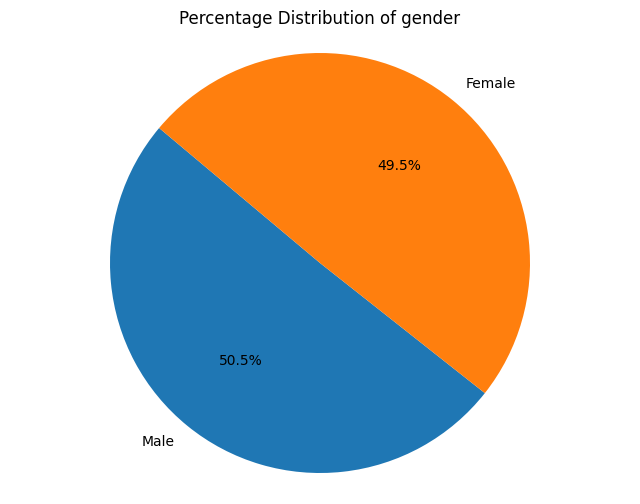

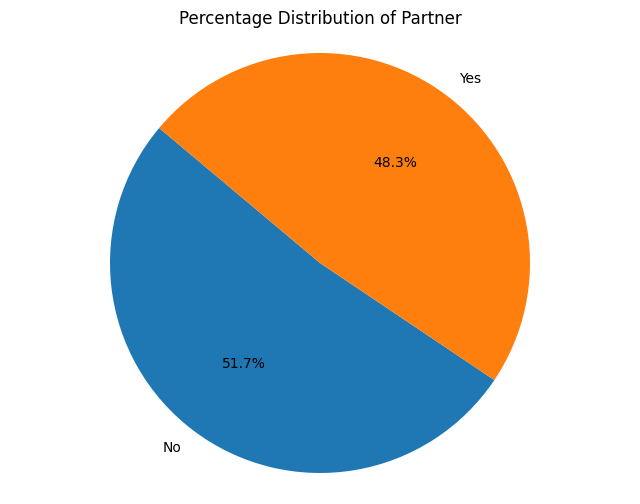

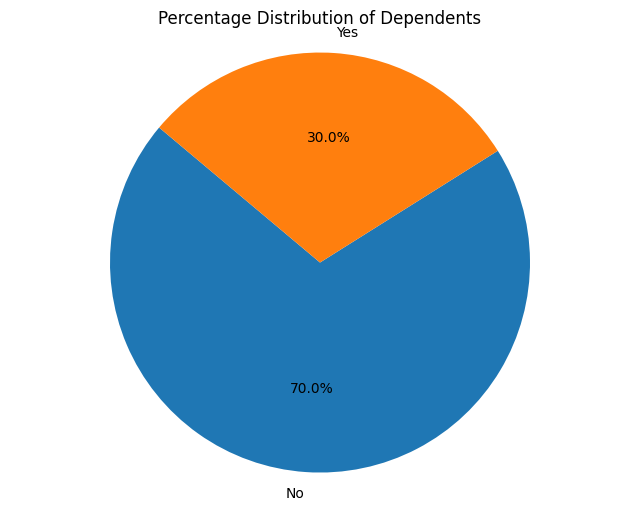

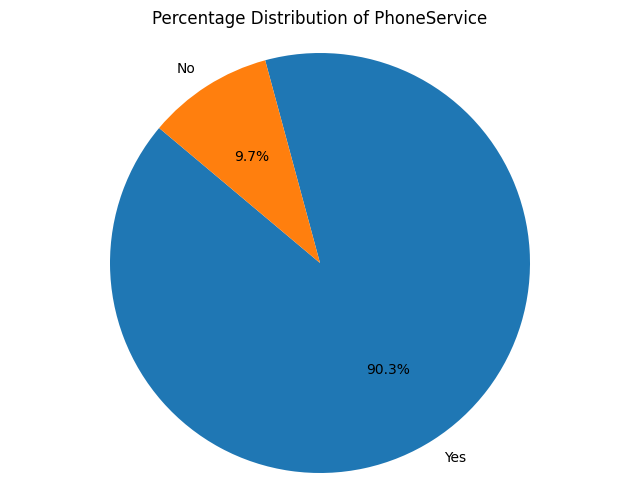

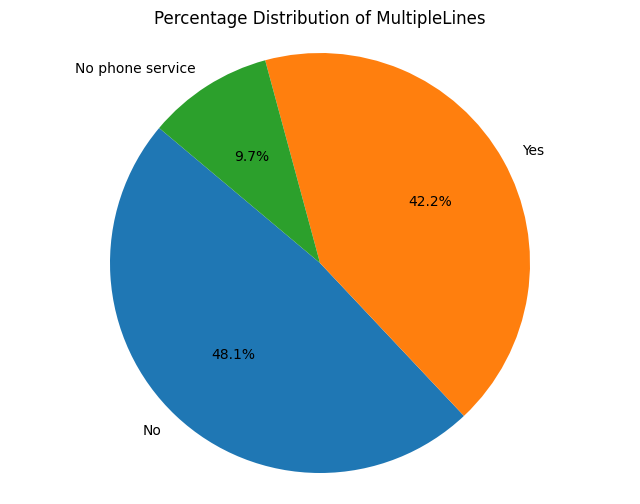

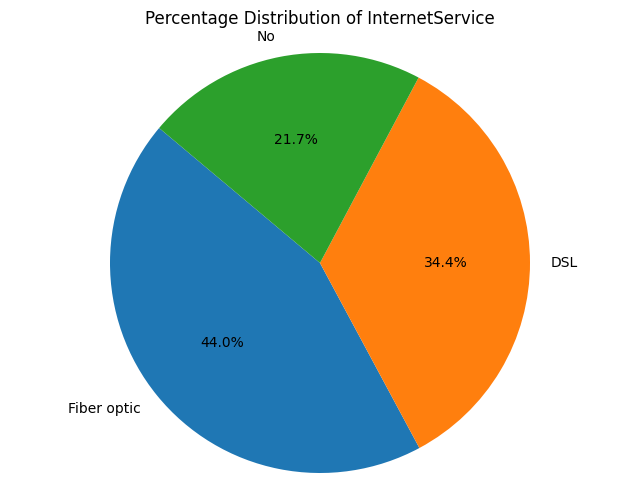

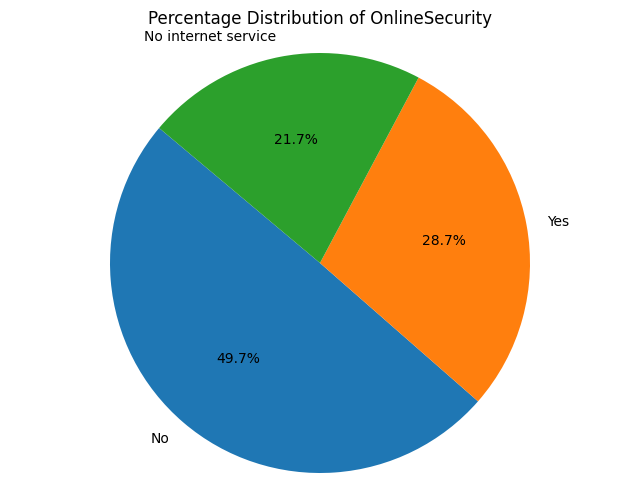

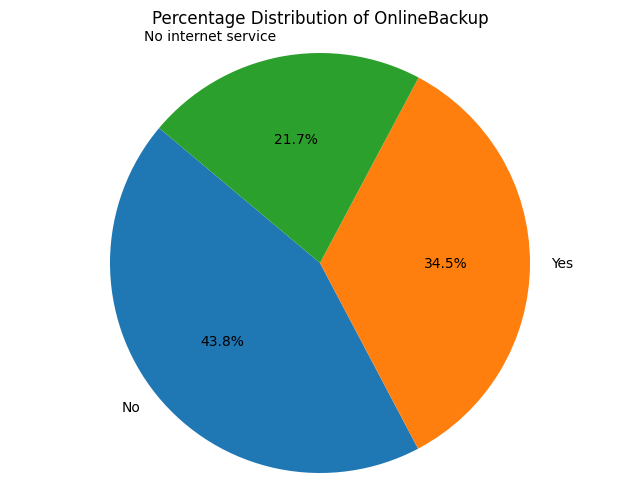

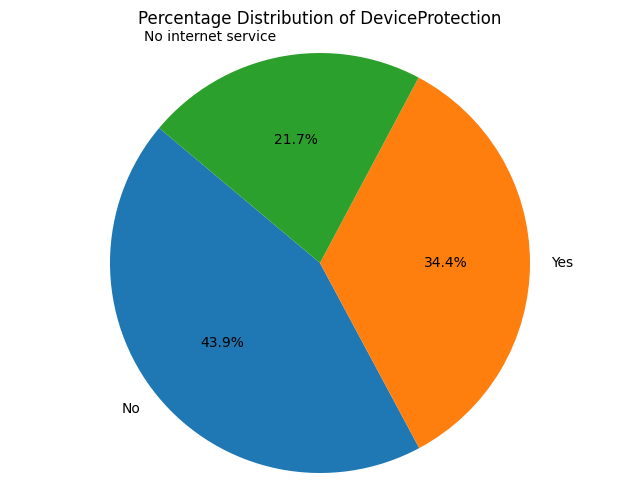

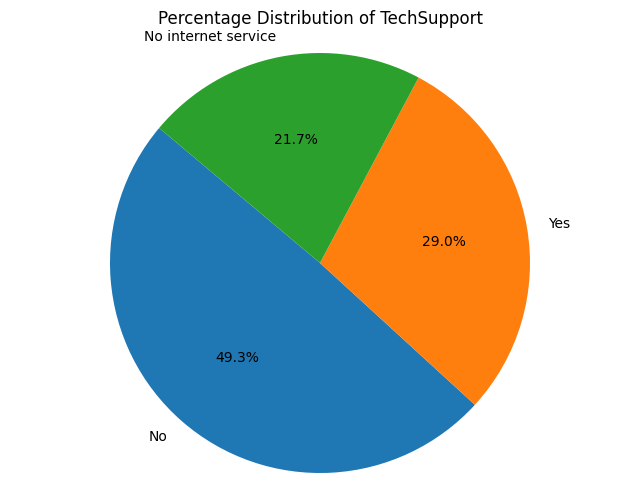

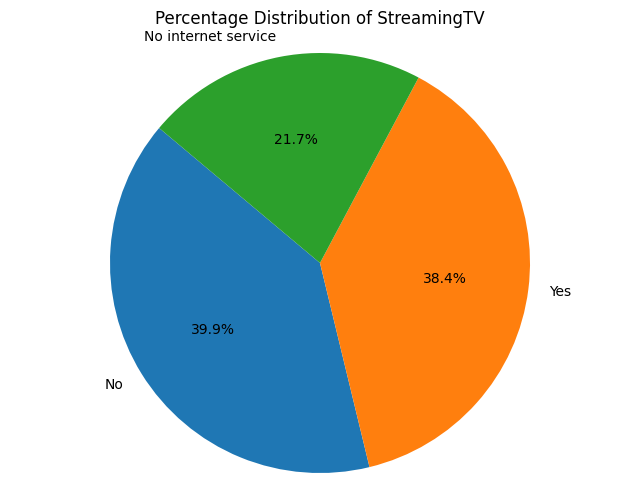

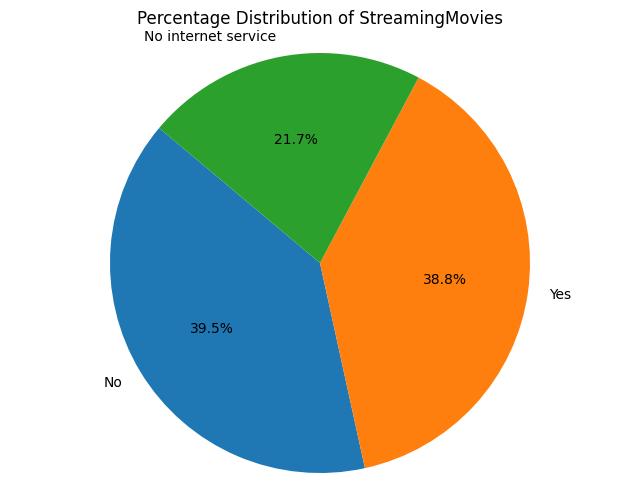

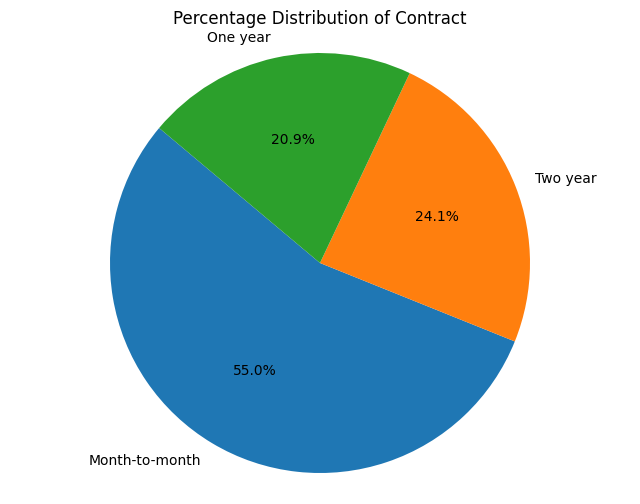

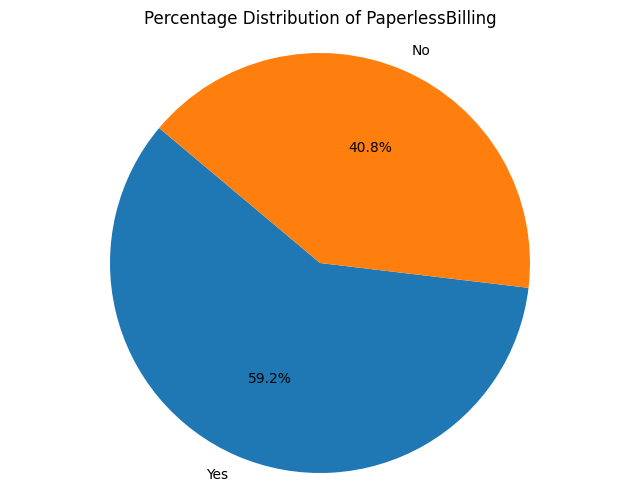

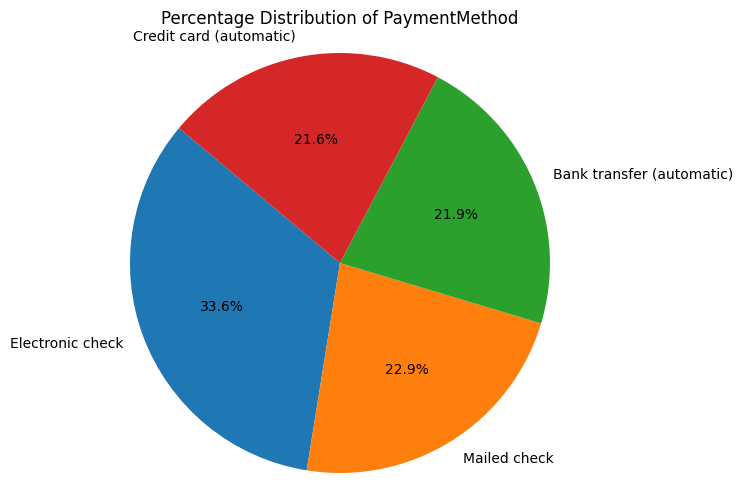

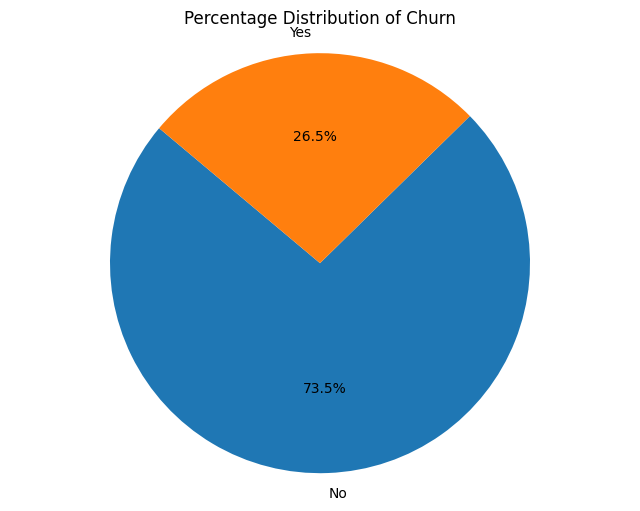

In [ ]:
pie_chart(churn)

1. Percentage distribution of Gender :
  - We can see that the Gender is almost split equally in this dataset.

2. Percentage distribution of Partner :
  - This indicates that there is a slight edge for the people that doesn't have a partner in the dataset.

3. Percentage distribution of Dependents :
  - This show that a large group of customers does not have any dependents

4. Percentage distribution of PhoneService :
  - This Pie Chart depicts that about 90.3% of the customers use phone services

5. Percentage distribution of MultipleLines :
  - This shows that majorly customers do no use multipleline, but also there is a healthy amount of customer that also use multiplelines

6. Percentage distribution of InternetService :
  - Majority of the customers use Fibre Optics, and the next best is DSL

7. Percentage distribution of OnlineSecurity :
  - Around 49.7% of the customer does not use OnlineSecurity facility/feature.

8. Percentage distribution of OnlineBackup :
  - Same as OnlineSecurity where this option is not well received by the customers but still a considerate amount of customer uses this function

9. Percentage distribution of DeviceProtection :
  - Not something that the customer opt in since 'No' has the majority here, still considerate amount of customer uses these.

10. Percentage distribution of TechSupport :
  - Majority said 'No' for TechSupport which is surprise

11. Percentage distribution of StreamingTV :
  - Its almost equal between 'Yes' and 'No' and few who doesn't have internet.

12. Percentage distribution of StreamingMovies :
  - Again almost similar distribution between 'Yes' and 'No' and some who  doesn't have internet.

13. Percentage distribution of Contract:
  - Mostle customers have month to month contractn with few opting for 2 year and very few opting for 1 year plans respectively.

14. Percentage distribution of PaperlessBilling :
  - Around 59.2% of customers prefer paperless billing which is ecofriendly and other preferring the old way of paper billing

15. Percentage distribution of PaymentMethod :
  - Electronic Check seems to be what most customers use as payment method with slight edge whereas the other three methods Mailed Check, Bank Transfer(automatic) and Credit Card (Automatic) have almost the same percentage distribution on how customer pay the bill.

16. Percentage distribution of Churn:
  - 'No' seems to what the customer prefer to do which is really good for the company indicating that there are several things which works for customers that make them stay with our Telecom Company.

In [ ]:
replacestruct ={
    'Partner' : {'Yes' : 1, 'No' : 0},
    'Dependents' : {'Yes' : 1, 'No' : 0},
    'PhoneService' : {'Yes' : 1, 'No' : 0},
    'MultipleLines' : {'Yes' : 1, 'No' : 0,'No phone service' : 2},
    'InternetService' : {'Fiber optic' : 1, 'No' : 0,'DSL' : 2},
    'OnlineSecurity' : {'Yes' : 1, 'No' : 0,'No internet service' : 2},
    'OnlineBackup' : {'Yes' : 1, 'No' : 0,'No internet service' : 2},
    'DeviceProtection' : {'Yes' : 1, 'No' : 0,'No internet service' : 2},
    'TechSupport' : {'Yes' : 1, 'No' : 0,'No internet service' : 2},
    'StreamingTV' : {'Yes' : 1, 'No' : 0,'No internet service' : 2},
    'StreamingMovies' : {'Yes' : 1, 'No' : 0,'No internet service' : 2},
    'Contract' : {'Month-to-month' : 1, 'Two year' : 2 ,'One year' : 3},
    'PaperlessBilling' : {'Yes' : 1, 'No' : 0},
    'PaymentMethod' : {'Electronic check' : 1, 'Mailed check' : 2, 'Bank transfer (automatic)' : 3, 'Credit card (automatic)' : 4},
    'Churn' : {'Yes' : 1, 'No' : 0}
}

onehotcols = ['gender']


In [ ]:
churn = churn.replace(replacestruct)
churn = pd.get_dummies(churn,columns = onehotcols,dtype = int)
churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,7590-VHVEG,0,1,0,1,0,2,2,0,1,0,0,0,0,1,1,1,29.85,29.85,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,2,1,0,1,0,0,0,3,0,2,56.95,1889.50,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,2,1,1,0,0,0,0,1,1,2,53.85,108.15,1,0,1
3,7795-CFOCW,0,0,0,45,0,2,2,1,0,1,1,0,0,3,0,3,42.30,1840.75,0,0,1
4,9237-HQITU,0,0,0,2,1,0,1,0,0,0,0,0,0,1,1,1,70.70,151.65,1,1,0


In [ ]:
x = churn.drop(['customerID','Churn'],axis = 1)
y = churn['Churn']

x_scaled = x.apply(zscore)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 1, stratify = y)

In [ ]:
y.value_counts(normalize = True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [ ]:
dTree = DecisionTreeClassifier(random_state = 1)
dTree.fit(x_train, y_train)
# print(pd.DataFrame(dTree.feature_importances_, columns = ['Imp'], index = x_train.columns))

DecisionTreeClassifier(random_state=1)

In [ ]:
dTree_tuned = DecisionTreeClassifier(random_state = 1)

parameter_grid_dTree = {
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' :[i for i in range(1,21)],
    'class_weight' : [{0 : 0.26, 1 : 0.73}]
}

dTree_grid_search = GridSearchCV(dTree_tuned, param_grid = parameter_grid_dTree, cv = 5)
dTree_grid_search.fit(x_train, y_train)

dTree_tuned = dTree_grid_search.best_estimator_
dTree_tuned.fit(x_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.26, 1: 0.73}, max_depth=4,
                       random_state=1)

In [ ]:
def get_metrics_score(model,flag = True):
  '''
  model : classifier to predict values of x
  '''
  score_list = []

  pred_train = model.predict(x_train)
  pred_test = model.predict(x_test)

  train_acc = model.score(x_train, y_train)
  test_acc = model.score(x_test, y_test)

  train_recall = metrics.recall_score(y_train, pred_train)
  test_recall = metrics.recall_score(y_test, pred_test)

  train_precision = metrics.precision_score(y_train, pred_train)
  test_precision = metrics.precision_score(y_test, pred_test)

  score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision))

  if flag == True:
    print('Accuracy on Training Set :',model.score(x_train,y_train))
    print('Accuracy on Test Set :',model.score(x_test,y_test))
    print('Recall on Training Set :',metrics.recall_score(y_train, pred_train))
    print('Recall on Test Set :',metrics.recall_score(y_test, pred_test))
    print('Precision on Training Set :',metrics.precision_score(y_train,pred_train))
    print('Precision on Test Set :',metrics.precision_score(y_test,pred_test))

  return score_list

dTree_score = get_metrics_score(dTree)


Accuracy on Training Set : 0.9978700745473909
Accuracy on Test Set : 0.7217885024840313
Recall on Training Set : 0.9919732441471572
Recall on Test Set : 0.4786096256684492
Precision on Training Set : 1.0
Precision on Test Set : 0.47606382978723405


In [ ]:
dTree_tuned_score = get_metrics_score(dTree_tuned)

Accuracy on Training Set : 0.7660631877884274
Accuracy on Test Set : 0.751596877217885
Recall on Training Set : 0.7612040133779264
Recall on Test Set : 0.7540106951871658
Precision on Training Set : 0.5421629347308242
Precision on Test Set : 0.5222222222222223


- When looking at the evaluation metrics of both the base Decision Tree model and using GridSearchCV it is clear that the base model has overfitted the data (i.e.) It as capturing all the information as well as noise which is evident when evaluating with the test data as well.

- This is because the DecisionTree tries to categorize until the every point has its own split in the mean process capturing the noise as well

- Recall and Precision are also not that great in the base model due to overfit.

- But in GridSearchCV we have used max_depth with range of values so that overfit can be avoided along with some couple of different parameters with different values, with this we can say that we've built an decent model which can get the job done.

In [ ]:
rf_tree = RandomForestClassifier(random_state = 1)
rf_tree.fit(x_train, y_train)
rf_tree_score = get_metrics_score(rf_tree)
# print('')
#print(pd.DataFrame(rf_tree.feature_importances_, columns = ['Imp'], index = x_train.columns))

Accuracy on Training Set : 0.9976925807596734
Accuracy on Test Set : 0.7856635911994322
Recall on Training Set : 0.9946488294314382
Recall on Test Set : 0.4679144385026738
Precision on Training Set : 0.9966487935656837
Precision on Test Set : 0.6294964028776978


In [ ]:
rf_tree_tuned = RandomForestClassifier(random_state = 1)

parameter_grid_rftree = {
    'n_estimators' : [100, 150, 200, 250],
    #'min_samples_leaf' : np.arange(5,10),
    'max_features' : np.arange(0.2, 0.7, 0.1),
    'max_samples' : np.arange(0.3, 0.7, 0.1),
    'class_weight' : [{0 : 0.26, 1 : 0.73}]
}

rftree_grid_search = GridSearchCV(estimator = rf_tree, param_grid = parameter_grid_rftree, cv = 5,n_jobs= -1)
rftree_grid_search.fit(x_train, y_train)

rf_tree_tuned = rftree_grid_search.best_estimator_
rf_tree_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.26, 1: 0.73}, max_features=0.2,
                       max_samples=0.3, random_state=1)

In [ ]:
rf_tree_tuned_score = get_metrics_score(rf_tree_tuned)

Accuracy on Training Set : 0.8998935037273695
Accuracy on Test Set : 0.7977288857345636
Recall on Training Set : 0.7010033444816054
Recall on Test Set : 0.4679144385026738
Precision on Training Set : 0.8995708154506438
Precision on Test Set : 0.6704980842911877


- Comparing both the base RandomForestClassifier and with GridSearchCV there isn't much difference, when it comes to recall and precision we're seeing very slight improvement.

- Since Recall and Precision are important both the base model and GridSearchCV tuned model's performance on test data are not satisfactory.

In [ ]:
abcl = AdaBoostClassifier(random_state = 1)
abcl.fit(x_train, y_train)
abcl_score = get_metrics_score(abcl)

Accuracy on Training Set : 0.8067092651757188
Accuracy on Test Set : 0.794180269694819
Recall on Training Set : 0.5418060200668896
Recall on Test Set : 0.5026737967914439
Precision on Training Set : 0.6672158154859967
Precision on Test Set : 0.6438356164383562


In [ ]:
abcl_tuned = AdaBoostClassifier(random_state = 1)

abcl_grid = {
    'n_estimators' : [100, 150, 200],
    'learning_rate' : np.linspace(0.01, 1.0, 10),
}

abcl_grid_search = GridSearchCV(estimator = abcl, param_grid= abcl_grid, cv = 5 )
abcl_grid_search.fit(x_train, y_train)

abcl_tuned = abcl_grid_search.best_estimator_
abcl_tuned.fit(x_train, y_train)


AdaBoostClassifier(learning_rate=0.34, n_estimators=100, random_state=1)

In [ ]:
abcl_tuned_score = get_metrics_score(abcl_tuned)

Accuracy on Training Set : 0.8079517216897408
Accuracy on Test Set : 0.8069552874378992
Recall on Training Set : 0.537123745819398
Recall on Test Set : 0.5187165775401069
Precision on Training Set : 0.6730930427493713
Precision on Test Set : 0.6783216783216783


- Comparing the base AdaBoostClassifier and with GridSearchCV, we can seet very slight increase in Test Accuracy, Test Recall and Test Precision and also very slight decrease in Train Recall and Precision

In [ ]:
gbcl = GradientBoostingClassifier(random_state = 1)
gbcl.fit(x_train, y_train)
gbcl_score = get_metrics_score(gbcl)

Accuracy on Training Set : 0.8285410010649628
Accuracy on Test Set : 0.8026969481902059
Recall on Training Set : 0.5765886287625418
Recall on Test Set : 0.5213903743315508
Precision on Training Set : 0.7213389121338912
Precision on Test Set : 0.6632653061224489


In [ ]:
gbcl_tuned = GradientBoostingClassifier(random_state = 1)

gbcl_grid = {
    'loss' : ['log_loss', 'exponential'],
    'learning_rate' : np.linspace(0.01, 1.0, 10),
    'n_estimators' : [100,150,200],
    #'criterion' : ['friedman_mse', 'squared_error'],
    #'min_samples_split' : [2, 5, 10, 20, 50, 100],
    #'max_depth' : np.arange(1,11)
}

In [ ]:
gbcl_grid_search = GridSearchCV(estimator = gbcl, param_grid = gbcl_grid, cv = 5, n_jobs = -1)
gbcl_grid_search.fit(x_train, y_train)

grid_tuned = gbcl_grid_search.best_estimator_
grid_tuned.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.12, loss='exponential',
                           random_state=1)

In [ ]:
grid_tuned_score = get_metrics_score(grid_tuned)

Accuracy on Training Set : 0.8232161874334398
Accuracy on Test Set : 0.8041163946061036
Recall on Training Set : 0.5745819397993311
Recall on Test Set : 0.5374331550802139
Precision on Training Set : 0.70467596390484
Precision on Test Set : 0.6611842105263158


- Comparing with base GradientBoostingClassifier with GridSearchCV, the results are not that different from each other, we can see very slight increase in test recall.

In [ ]:
models = [dTree, dTree_grid_search, rf_tree, rftree_grid_search, abcl, abcl_grid_search, gbcl, gbcl_grid_search]

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

for model in models:
  # print(model)
  j = get_metrics_score(model,False)
  acc_train.append(np.round(j[0],2))
  acc_test.append(np.round(j[1],2))
  recall_train.append(np.round(j[2],2))
  recall_test.append(np.round(j[3],2))
  precision_train.append(np.round(j[4],2))
  precision_test.append(np.round(j[5],2))


In [ ]:
comparison_frame = pd.DataFrame({
      'Models' : ['DecisionTree', 'DecisionTree with GridSearchCV', 'RandomForest',  'RandomForest with GridSearchCV', 'AdaBoost', 'AdaBoost with GridSearchCV', 'GradientBoost', 'GradientBoost with GridSearchCV'],
      'Train Accuracy' : acc_train,
      'Test Accuracy' : acc_test,
      'Train Recall' : recall_train,
      'Test Recall' : recall_test,
      'Train Precision' : precision_train,
      'Test Precision' : precision_test
  })

comparison_frame

,Models,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision
0,DecisionTree,1.00,0.72,0.99,0.48,1.00,0.48
1,DecisionTree with GridSearchCV,0.77,0.75,0.76,0.75,0.54,0.52
2,RandomForest,1.00,0.79,0.99,0.47,1.00,0.63
3,RandomForest with GridSearchCV,0.90,0.80,0.70,0.47,0.90,0.67
4,AdaBoost,0.81,0.79,0.54,0.50,0.67,0.64
5,AdaBoost with GridSearchCV,0.81,0.81,0.54,0.52,0.67,0.68
6,GradientBoost,0.83,0.80,0.58,0.52,0.72,0.66
7,GradientBoost with GridSearchCV,0.82,0.80,0.57,0.54,0.70,0.66


- We could see the different models with different metrics that we have built from the churn dataset.

- There are models which are clearly overfit since they are base model with no altercations and then followed by models which are finetuned by GridSearchCV.

- In this particular scenario of whether customers could churn, **Recall** metric is very important as it measures the ability of the model to identify all the customer who are likely to churn(positive cases).

- Higher Recall means model is effective in capturing most of the customer who might churn which potentially reduces losing customers and could avoid revenue loss.

- So, when comparing all the models **DecisionTree with GridSearchCV** stands out as it performs well in Training and Testing Accuracy as well as Training and Testing Recall.

- **DecisionTree with GridSearchCV** would be the ideal choice to go for.

- DecisionTree's are really powerful supervised learning algorithm but the problem with it is that it can really quickly get overfit, the trees just goes on and on until there exist a single datapoint inside a split, this could potential fit the information as well as the noise.

- The noise is always a changing factor, so learning from noise leads to overfitting.

- But in the case of GridSearchCV we've expermiented with a list of parameters which the GridSearchCv tries with the model and give out the best performing model,

```
Parameters :

max_depth : Help us in pruning the tree so that we can control the tree from going for the very last split

class_weight : When we have unbalanced data this parameter help us to balance the weightage between the classes present in the target variable

criterion : the method  by which we calculate which could be the best split for a node
```





